In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=10,5
# sns.set_style("whitegrid")

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv('/Users/harkiratchahal/Desktop/Coding/Tutorials/mlops_2/artifacts/data_ingestion/data.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [27]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [28]:
# fill missing values with 0 to indicate unemployed

In [29]:
df.fillna(0, inplace=True)

In [30]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [31]:
# drop useless columns

df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Dealing with Outliers

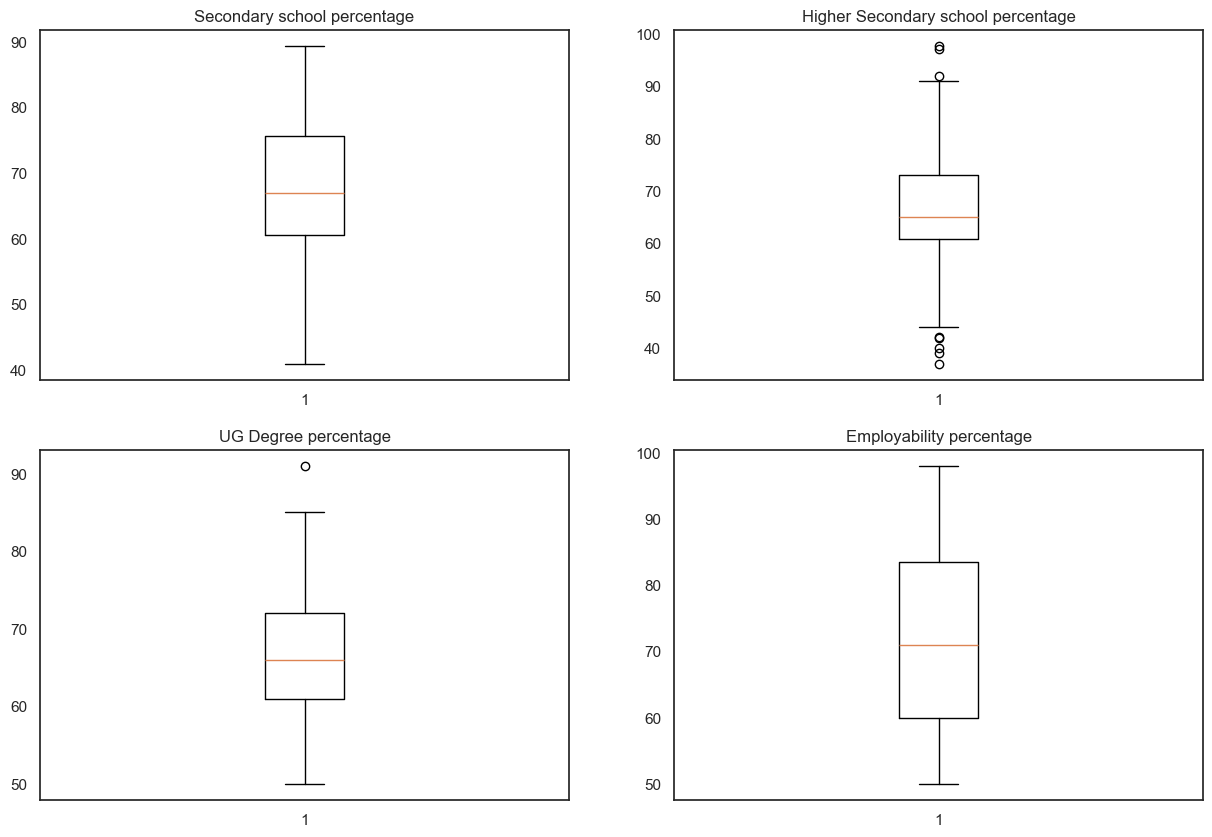

In [33]:
plt.figure(figsize = (15, 10))
# plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage');

# Most of the outliers are in the 'hsc percentage', we need to clear them up

In [34]:
# find the 25th & 75th quantile of hsc percentage

Q1=df['hsc_p'].quantile(0.25)
Q3=df['hsc_p'].quantile(0.75)

IQR=Q3-Q1

filter=(df['hsc_p'] >= Q1 - 1.5*IQR) & (df['hsc_p'] <= Q3 + 1.5*IQR)
df_filtered=df.loc[filter]

In [35]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          207 non-null    object 
 1   ssc_p           207 non-null    float64
 2   hsc_p           207 non-null    float64
 3   hsc_s           207 non-null    object 
 4   degree_p        207 non-null    float64
 5   degree_t        207 non-null    object 
 6   workex          207 non-null    object 
 7   etest_p         207 non-null    float64
 8   specialisation  207 non-null    object 
 9   mba_p           207 non-null    float64
 10  status          207 non-null    object 
 11  salary          207 non-null    float64
dtypes: float64(6), object(6)
memory usage: 21.0+ KB


# EDA

In [36]:
df_filtered.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

In [37]:
cols=['gender','hsc_s','degree_t','specialisation','workex','status']

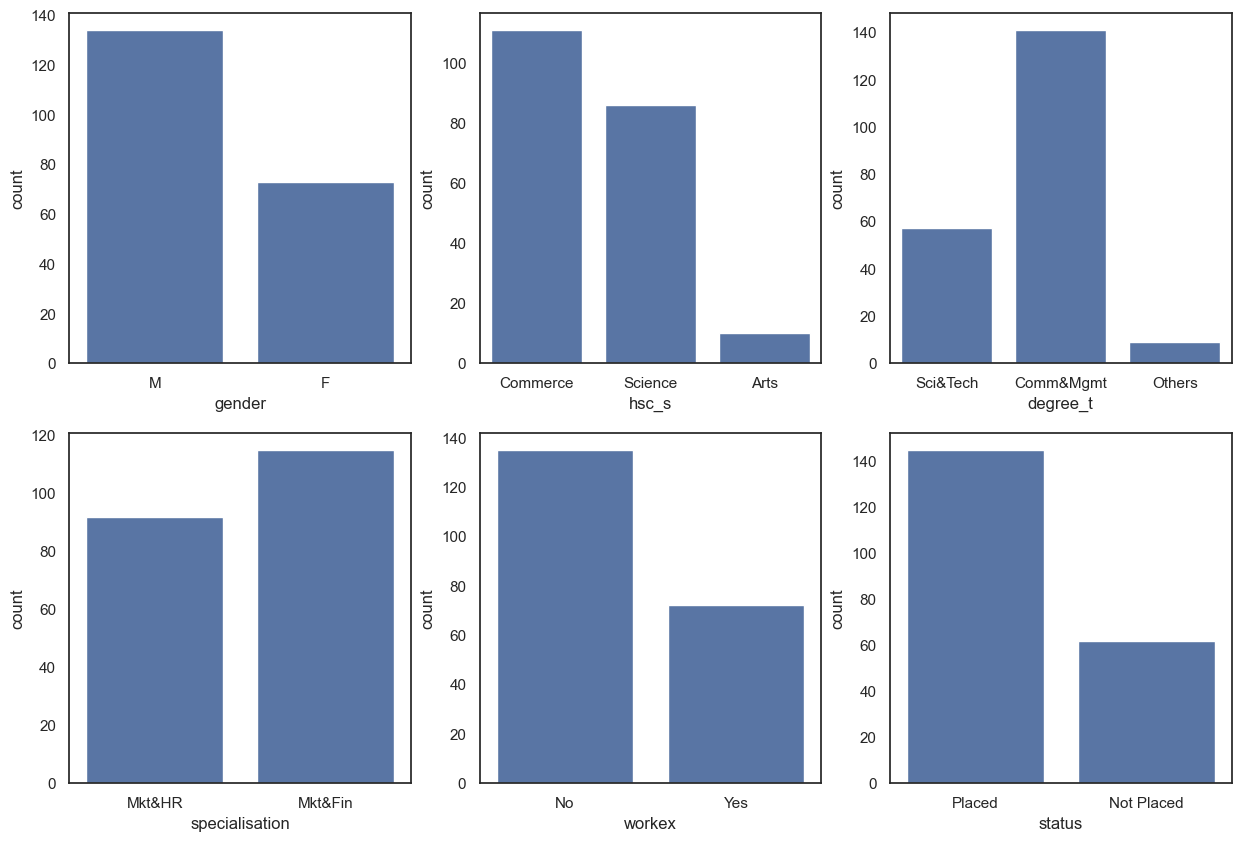

In [38]:
plt.figure(figsize = (15, 10))
for i,column in enumerate(cols):
    temp=230+i+1
    plt.subplot(temp)
    ax=sns.countplot(x=column, data=df_filtered)

## Salary Distribution of Placed Students

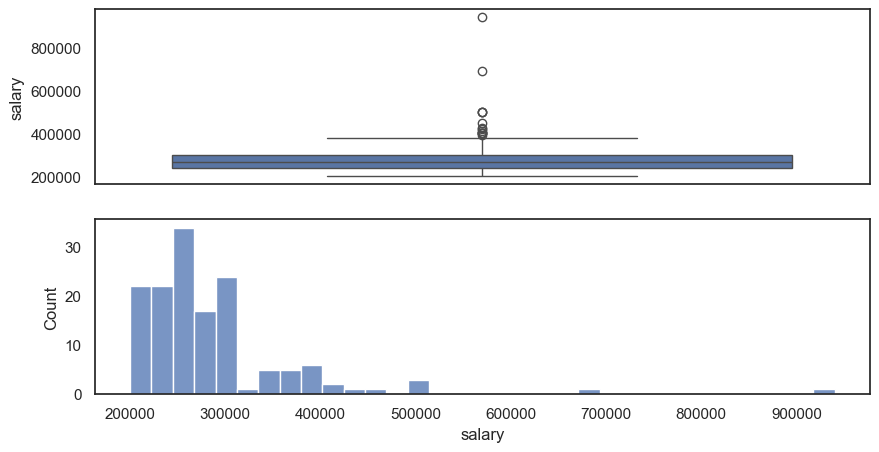

In [39]:
plt.figure(figsize=(10,5))
placed=df_filtered[df_filtered.salary!=0]
plt.subplot(2,1,1)
sns.boxplot(placed['salary'])
plt.subplot(2,1,2)
sns.histplot(placed['salary']);

## Employability Score v/s Salary

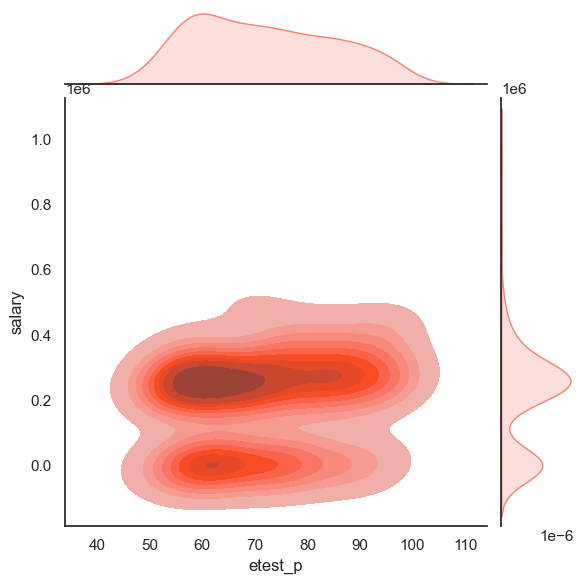

In [40]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_filtered['etest_p'], y=df_filtered['salary'], kind='kde', fill=True, color='salmon')

## Work Experience v/s Placement Status

<Axes: xlabel='workex', ylabel='count'>

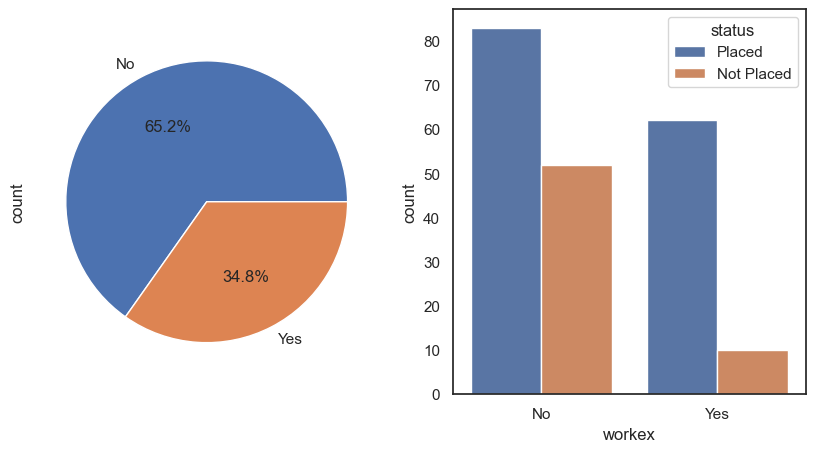

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_filtered['workex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='workex', data=df_filtered, hue='status')

## MBA Percentage v/s Employability Score

## Is there gender bias in Salary Amount?

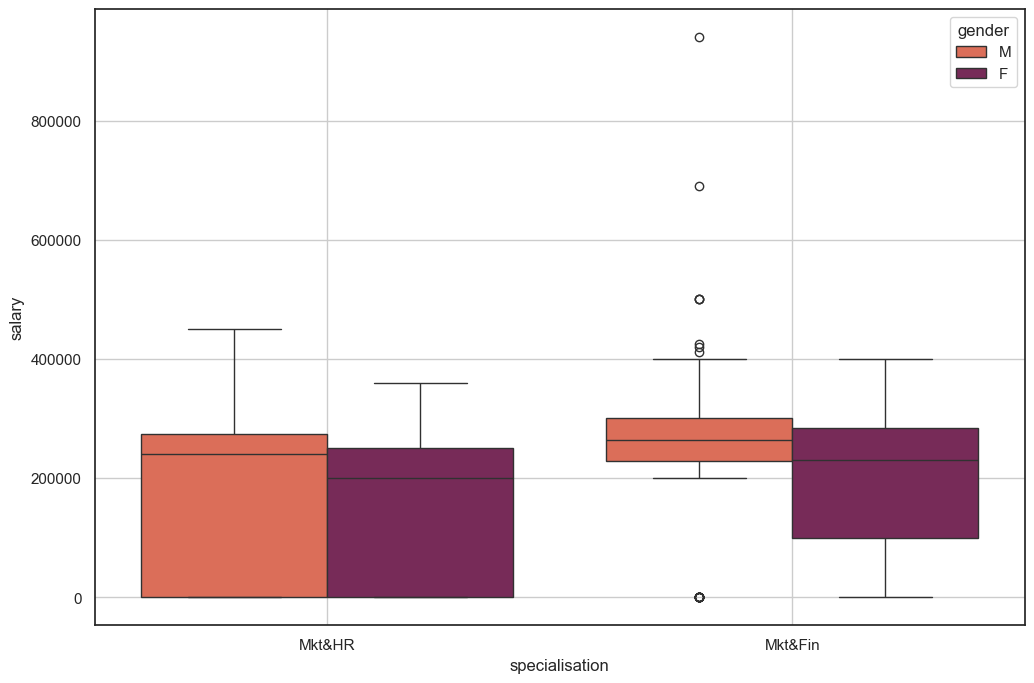

In [42]:
sns.boxplot(x=df_filtered['specialisation'], y=df_filtered['salary'], hue=df_filtered['gender'], palette='rocket_r')
plt.grid()

# Probablities

In [43]:
df_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [44]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df_filtered[item].unique():
            row = {'Condition': item}
            total = len(df_filtered[df_filtered[item] == level])
            n = len(df_filtered[(df_filtered[item] == level) & (df_filtered.status == 'Placed')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

## Probability of getting placed wrt degree

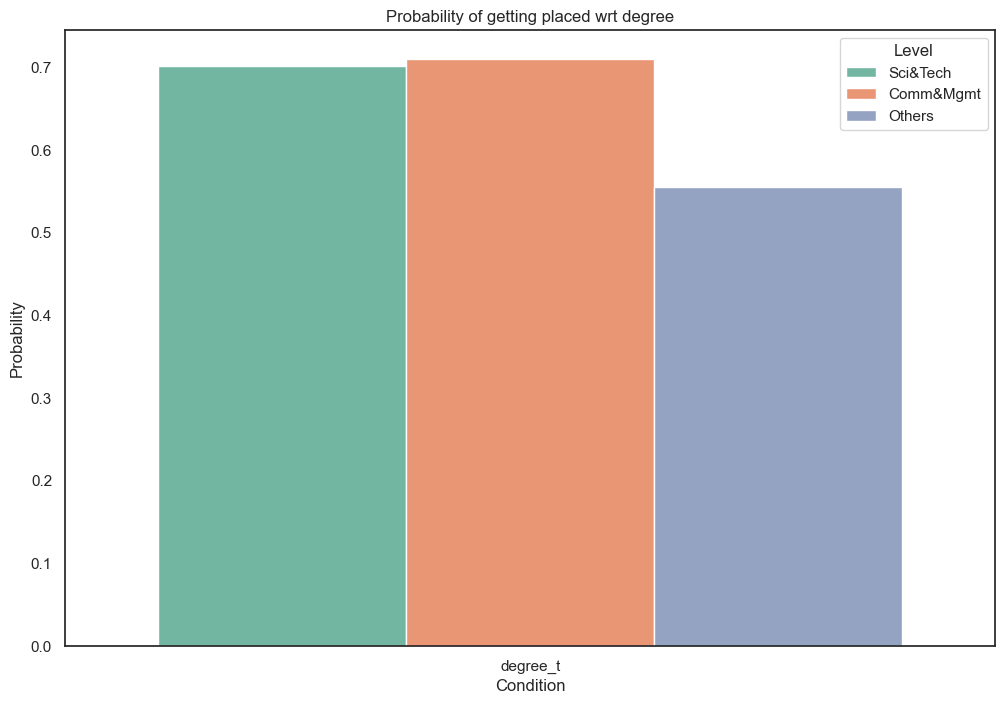

In [45]:
sns.barplot(data = probStatusCategorical(['degree_t']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of getting placed wrt degree')
plt.ylabel('Probability');


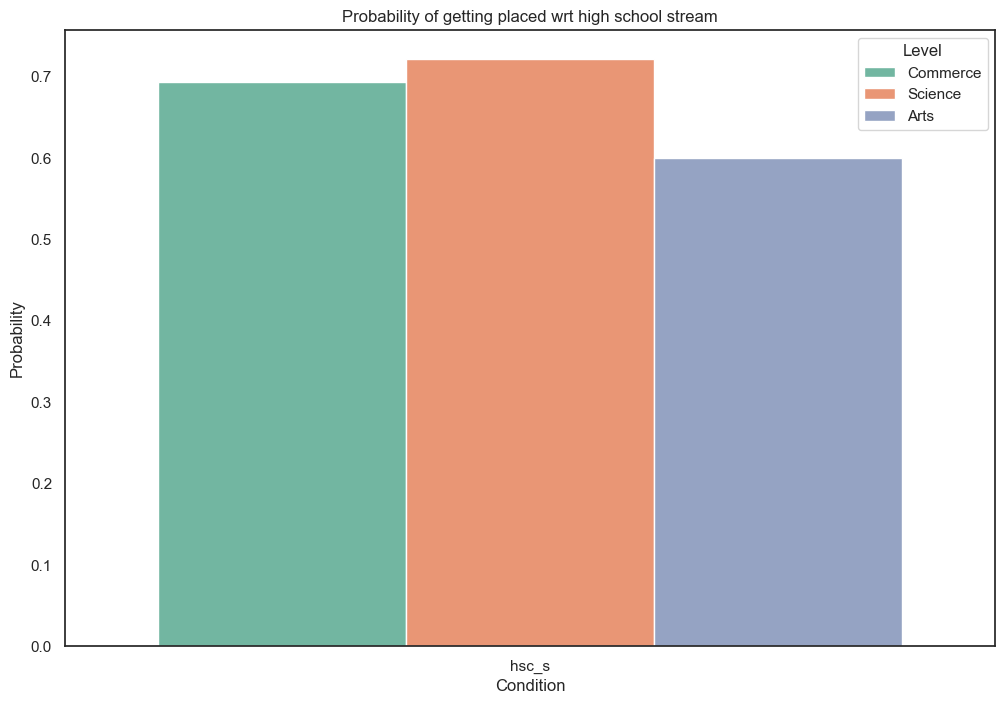

In [46]:
sns.barplot(data = probStatusCategorical(['hsc_s']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of getting placed wrt high school stream')
plt.ylabel('Probability');

## Probability of getting placed wrt gender

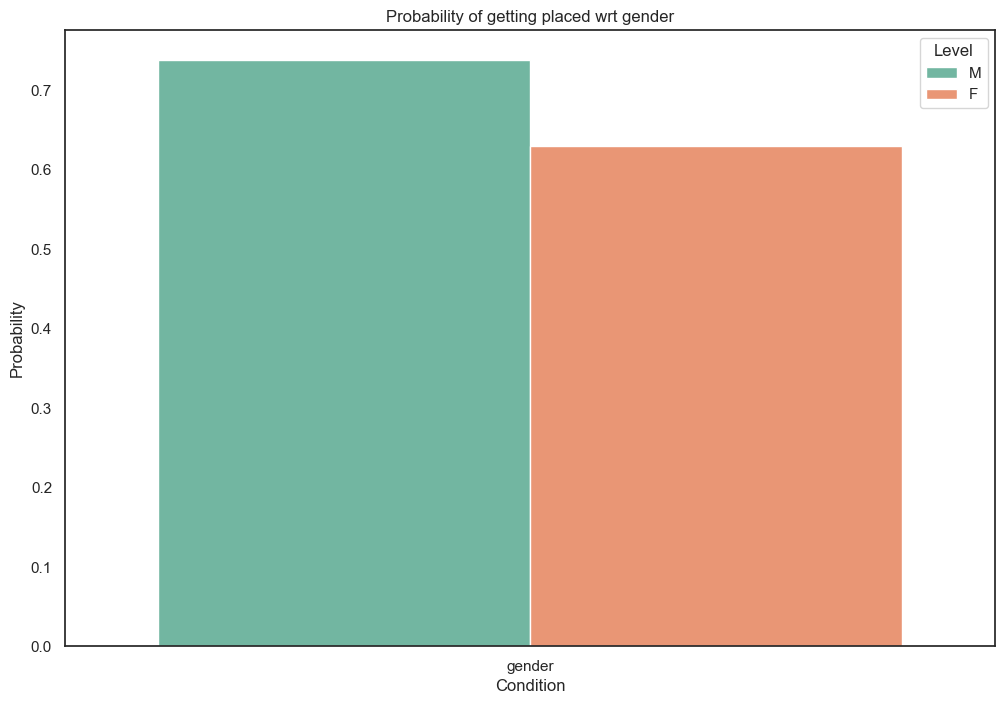

In [47]:
sns.barplot(data = probStatusCategorical(['gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of getting placed wrt gender')
plt.ylabel('Probability');

## Probability of getting placed wrt specialization

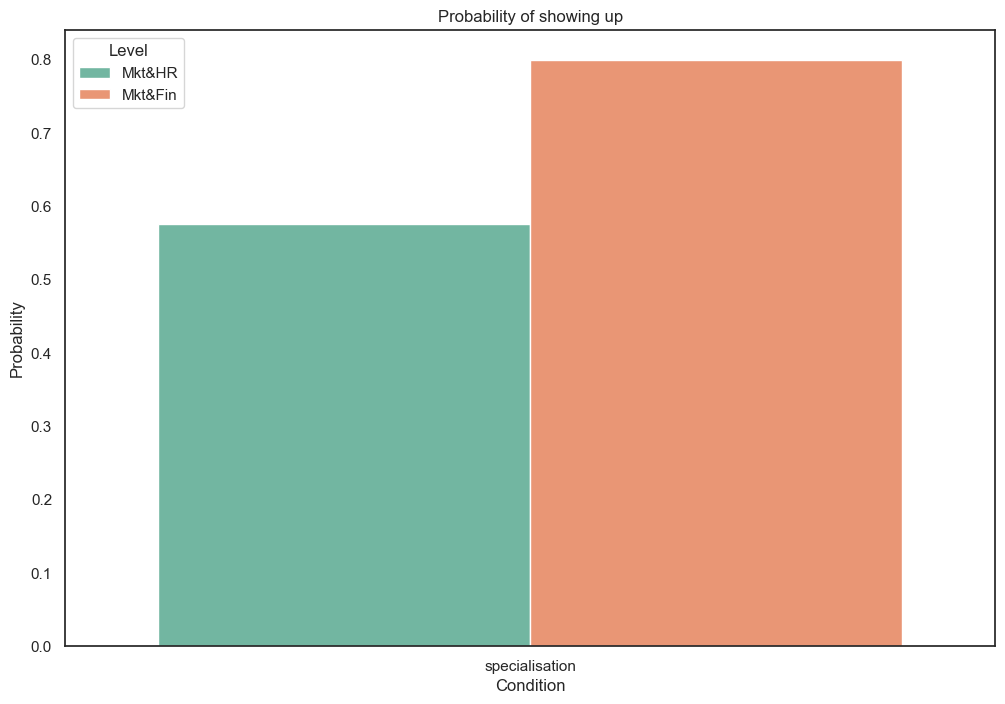

In [55]:
sns.barplot(data = probStatusCategorical(['specialisation']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability');

## Corelation between Academic Percentages

In [56]:
sns.heatmap(df_filtered.corr(), annot=True, fmt='.1g',cmap="RdYlGn");

ValueError: could not convert string to float: 'M'

# Preparing Data

## Label Encoding

In [57]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [58]:
df_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [59]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

placement_filtered=df_filtered.copy()

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


## Dummy Encoding

In [60]:
object_cols=['hsc_s','degree_t']

for col in object_cols:
    final_df=pd.get_dummies(placement_filtered,prefix='dummy_', drop_first=True)

In [61]:
final_df.drop(['salary'], axis=1, inplace=True)

In [62]:
final_df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy__Commerce,dummy__Science,dummy__Others,dummy__Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,True,False,False,True
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,False,True,False,True
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,False,False,False,False
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,False,True,False,True
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,True,False,False,False


## Splitting into X & y

In [63]:
X=final_df.drop('status',axis=1)
y=final_df['status']

In [64]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 207, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 12)
Input Test: (42, 12)
Output Training: (165,)
Output Test: (42,)


# Training the Model

## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [99]:
# randomised search CV

#number of tress in random forest
n_estimators=[int(x) for x in np.linspace(0,2000,12)]

#number of features in every split
max_features=['auto','sqrt']

#max numberof levels in tree
max_depth=[int(x) for x in np.linspace(5,50,6)]

#min number of samples required to split the node
min_samples_split = [2, 5, 10, 15, 100, 200, 500]

#min number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [100]:
from sklearn.model_selection import RandomizedSearchCV

# create the random grid
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [0, 181, 363, 545, 727, 909, 1090, 1272, 1454, 1636, 1818, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 14, 23, 32, 41, 50], 'min_samples_split': [2, 5, 10, 15, 100, 200, 500], 'min_samples_leaf': [1, 2, 5, 10]}


In [101]:
rf_random=RandomizedSearchCV(estimator = model, 
                             param_distributions = random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter = 100, 
                             cv = 5,
                             verbose=2,
                             random_state=42,
                             n_jobs=1)

In [102]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1818; total time=   1.2s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1818; total time=   1.2s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1818; total time=   1.2s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1818; total time=   1.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1818; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=1636; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=1636; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 14, 23, 32, 41, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              200, 500],
                                        'n_estimators': [0, 181, 363, 545, 727,
                                                         909, 1090, 1272, 1454,
                                                         1636, 1818, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [103]:
# After fitting, find the best parameters like so:
best_params = rf_random.best_params_

print("Best parameters found: ", best_params)

Best parameters found:  {'n_estimators': 727, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}


In [104]:
y_pred=rf_random.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  2]
 [ 2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.94      0.94      0.94        32

    accuracy                           0.90        42
   macro avg       0.87      0.87      0.87        42
weighted avg       0.90      0.90      0.90        42



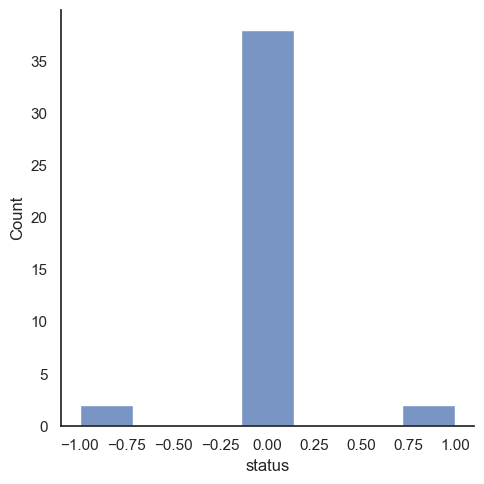

In [106]:
ax=sns.displot(y_test-y_pred);

In [107]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 90.47619047619048


## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

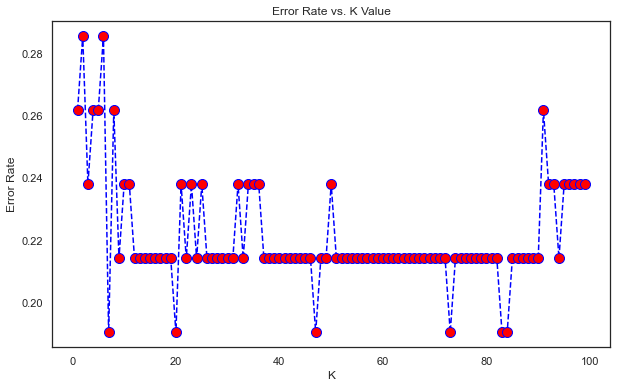

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [47]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 80.95238095238095


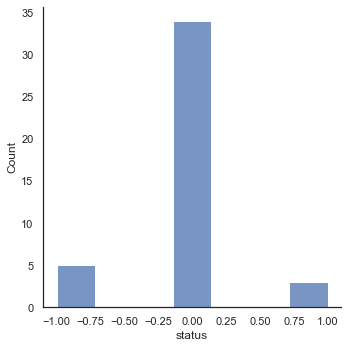

In [48]:
sns.displot(y_test-y_pred);

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 5  5]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.85      0.91      0.88        32

    accuracy                           0.81        42
   macro avg       0.74      0.70      0.72        42
weighted avg       0.80      0.81      0.80        42



## Feature Importance

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

Text(0.5, 1.0, 'Visualizing Important Features')

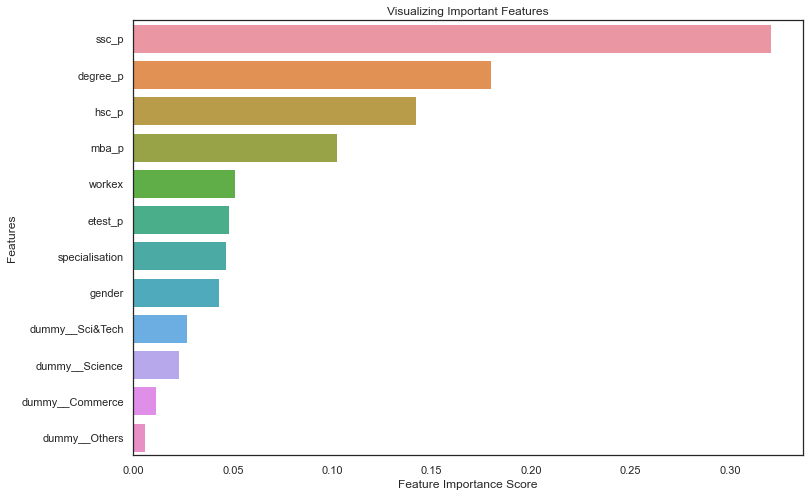

In [51]:
feature_importance=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

## Drop useless variables

In [52]:
X=final_df.drop(['status','dummy__Commerce','dummy__Science','dummy__Others','dummy__Sci&Tech'],axis=1)
y=final_df['status']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 8)
Input Test: (42, 8)
Output Training: (165,)
Output Test: (42,)


In [54]:
X_test.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
166,1,62.0,62.0,60.00,1,63.0,1,52.38
15,0,65.0,75.0,69.00,1,72.0,0,64.66
76,0,66.5,70.4,71.93,0,61.0,0,64.27
99,1,54.0,82.0,63.00,0,50.0,0,59.47
172,1,73.0,58.0,56.00,0,84.0,1,52.64


In [55]:
model=RandomForestClassifier()

# number of tress in random forest
n_estimators=[int(x) for x in np.linspace(0,1200,12)]

# number of features in every split
max_features=['auto','sqrt']

# max numberof levels in tree
max_depth=[int(x) for x in np.linspace(5,30,6)]

# min number of samples required to split the node
min_samples_split = [2, 5, 10, 15, 100]

# min number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

from sklearn.model_selection import RandomizedSearchCV

In [56]:
# create the random grid
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [0, 109, 218, 327, 436, 545, 654, 763, 872, 981, 1090, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [57]:
rf_random=RandomizedSearchCV(estimator = model, 
                             param_distributions = random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter = 10, 
                             cv = 5,
                             verbose=2,
                             random_state=42,
                             n_jobs=1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1090; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1090; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [0, 109, 218, 327, 436,
                                                         545, 654, 763, 872,
                                                         981, 1090, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
y_pred=rf_random.predict(X_test)

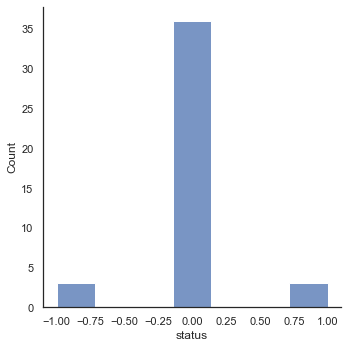

In [59]:
sns.displot(y_test-y_pred);

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 7  3]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.91      0.91      0.91        32

    accuracy                           0.86        42
   macro avg       0.80      0.80      0.80        42
weighted avg       0.86      0.86      0.86        42



In [61]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 85.71428571428571


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    object 
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    object 
 6   workex          215 non-null    object 
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    object 
 9   mba_p           215 non-null    float64
 10  status          215 non-null    object 
 11  salary          215 non-null    float64
dtypes: float64(6), object(6)
memory usage: 20.3+ KB


In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms

# Define the fitness function
def fitness_function(individual):
    # Extract hyperparameters from the individual
    n_estimators = individual[0]
    max_depth = individual[1]
    min_samples_split = individual[2]
    min_samples_leaf = individual[3]
    
    # Create the classifier
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)
    
    # Evaluate the classifier using cross-validation
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Return the average accuracy as the fitness value
    return np.mean(scores),

# Define the genetic algorithm parameters
POPULATION_SIZE = 50
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 5

# Define the individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("n_estimators", np.random.randint, 10, 1000)
toolbox.register("max_depth", np.random.randint, 1, 50)
toolbox.register("min_samples_split", np.random.randint, 2, 20)
toolbox.register("min_samples_leaf", np.random.randint, 1, 20)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the genetic operators
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[10, 1, 2, 1], up=[1000, 50, 20, 20], indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the hall of fame to store the best individuals
hall_of_fame = tools.HallOfFame(HALL_OF_FAME_SIZE)

# Run the genetic algorithm
population = toolbox.population(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)
stats.register("std", np.std)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hall_of_fame, verbose=True)

# Print the best individual and its fitness value
best_individual = hall_of_fame[0]
best_fitness = fitness_function(best_individual)[0]
print("Best individual: ", best_individual)
print("Best fitness: ", best_fitness)

KeyboardInterrupt: 